<br>
<br>

# Fahrzeugklassifizierung

## Anwendung: Parkplatzzuweisung oder Durchfahrtsverbot im Parkhaus, Mautstelle

<br>

## Gruppenmitglieder:

### Jakob Bleickert: Bildverarbeitung
### Lukas Harzheim: Längenmessung
### Konstantin Paulus: Klassifizierung

<br>

## 1. Bildverarbeitung

### Vorstellung der Videos und Fahrzeuge

In [1]:
from IPython.display import HTML

HTML("""<video alt="test" controls width="720" src="../datasets/side_daihatsu.mov"></video>""")

<br>

### Bibliotheken und Funktion der Bildverarbeitung

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def preprocessing(frame):
    
    global thresh
    
    blur = cv2.blur(frame,(5,5))                                            # filters
    blur0=cv2.medianBlur(blur,5)
    blur1= cv2.GaussianBlur(blur0,(5,5),0)
    blur2= cv2.bilateralFilter(blur1,9,75,75)

    hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)                            # color filter

    low = np.array([60, 50, 50])                                            # mask
    high = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, low, high)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)                            # gray picture
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)             # threshhold

    return thresh


<br>

### Extraktion und Analyse der Frames

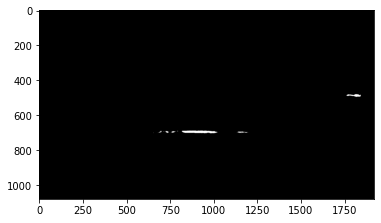

There are 3760 set to 255


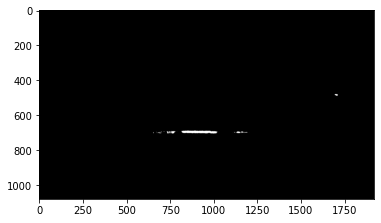

There are 3632 set to 255


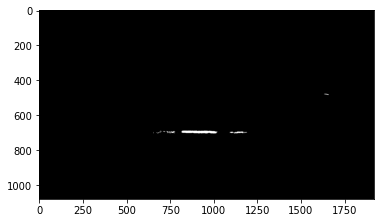

There are 3827 set to 255


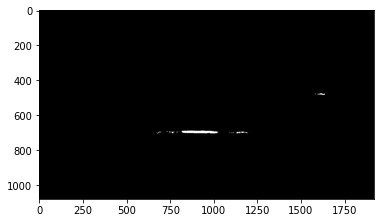

There are 3589 set to 255


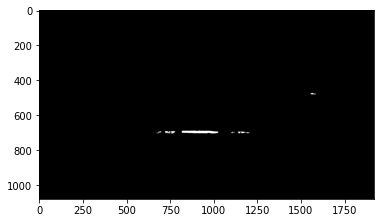

There are 3932 set to 255


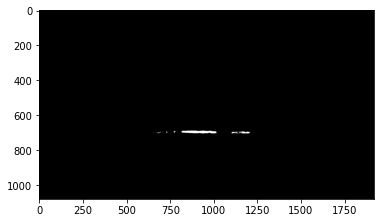

There are 3496 set to 255


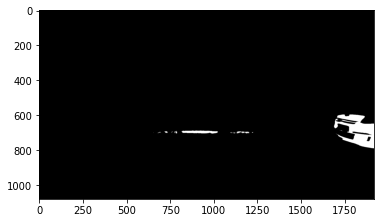

There are 26823 set to 255


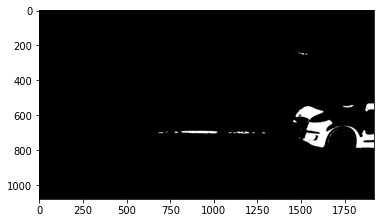

There are 36243 set to 255


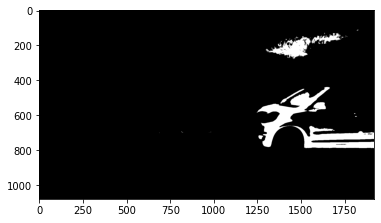

There are 88343 set to 255


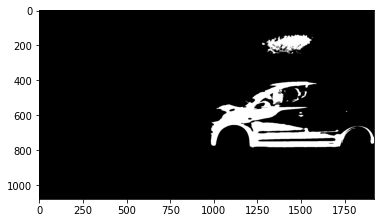

There are 125311 set to 255


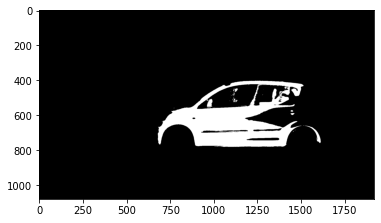

There are 148395 set to 255


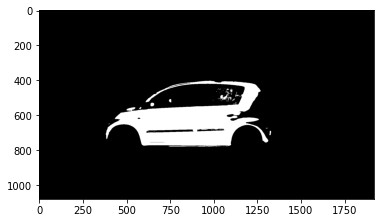

There are 158885 set to 255


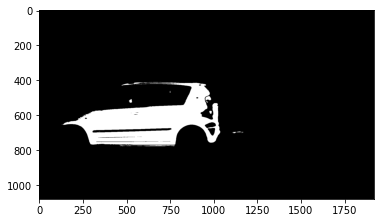

There are 151584 set to 255


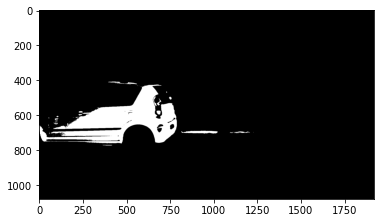

There are 114169 set to 255


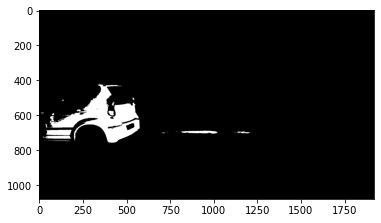

There are 72825 set to 255


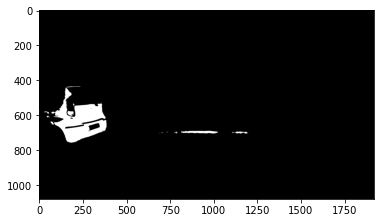

There are 47919 set to 255


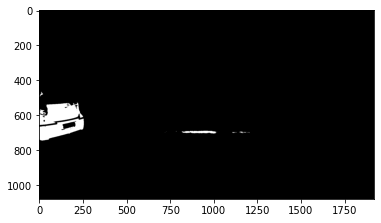

There are 39278 set to 255


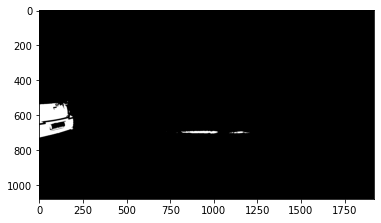

There are 28394 set to 255


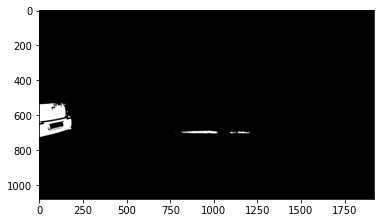

There are 26505 set to 255


In [3]:
cap = cv2.VideoCapture('../datasets/side_daihatsu.mov')                     # capture

count = 0                                                                   # frames passed
x = []                                                                      # frame
y = []                                                                      # amount of pixels

while cap.isOpened():                                                       # for each frame
    ret, frame = cap.read()

    if ret:
        
        preprocessing(frame)
        plt.imshow(thresh, cmap='gray')
        plt.show()
    
        nonzero = np.count_nonzero(thresh)                                  # count nonzero pixels
        print(f'There are {nonzero} set to 255')

        x.append(count)                                                     # save values for plotting
        y.append(nonzero)
        
        count += 12                                                         # 24/12 frames per second
        cap.set(1, count)

    else:

        break


<br>

### Bewertung der Frames

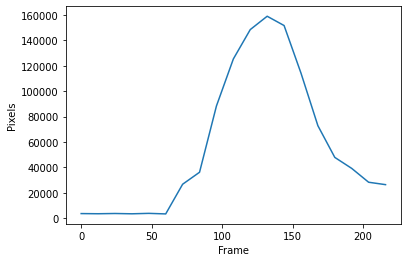

Maximum for Frame: 132


In [4]:
plt.plot(x, y)                                                              # plot nonzero pixels over frame
plt.ylabel('Pixels')
plt.xlabel('Frame')
plt.show()

a = np.array([x, y])                                                        # find maximum value and index in array
v = np.amax(a)
u = np.where(a == v)
final_frame = u [1][0] *12
print('Maximum for Frame:', final_frame)

<br>

### Ausgabe des finalen Frames

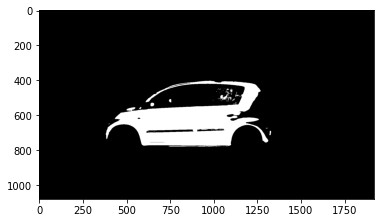

In [5]:
cap.set(1,final_frame)                                                      # extract final frame
ret, frame = cap.read()

preprocessing(frame)                                                        # preprocessing again
plt.imshow(thresh, cmap='gray')